In [29]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from lazypredict.Supervised import LazyClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
# load dataset
fifty_mel_vs_keratosis_neither_features_targets = pd.read_csv('../fifty_neither_vs_mel_keratosis_features_targets.csv')
fifty_mel_vs_keratosis_neither_features_targets.head() 

,image_id,green_iqr,blue_iqr,original_firstorder_Skewness,original_glcm_Autocorrelation,original_glcm_Imc1,original_glcm_Imc2,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_ngtdm_Complexity,original_ngtdm_Strength,melanoma,seborrheic_keratosis,neither
0,ISIC_0000001,58,40,-0.49,6.02,-0.40,0.77,4.67,0.97,0.30,2.78,0.81,0.12,0,0,1
1,ISIC_0000002,52,67,-0.31,3.99,-0.56,0.25,5.05,1.28,0.38,1.93,0.01,0.94,1,0,0
2,ISIC_0000003,57,48,-0.04,3.86,-0.38,0.43,5.16,1.41,0.43,2.21,0.12,0.08,0,0,1
3,ISIC_0000004,44,55,0.59,31.01,-0.77,0.99,4.67,0.81,0.27,4.28,3.15,2.21,1,0,0
4,ISIC_0000007,70,83,-0.75,3.93,-0.45,0.36,4.84,1.26,0.40,1.89,0.04,0.42,0,0,1


In [3]:
# diagnostic column:
## 1 - melanoma, 2 - seborrheic keratosis, 3 - neither

for i,u in enumerate(fifty_mel_vs_keratosis_neither_features_targets['image_id']):
    if fifty_mel_vs_keratosis_neither_features_targets.loc[i,'melanoma'] == 0:
        if fifty_mel_vs_keratosis_neither_features_targets.loc[i,'seborrheic_keratosis'] == 1:
            fifty_mel_vs_keratosis_neither_features_targets.loc[i,'melanoma'] = 2
    else:
        continue
        
fifty_mel_vs_keratosis_neither_features_targets.drop(columns=['seborrheic_keratosis', 'neither'], inplace=True)
fifty_mel_vs_keratosis_neither_features_targets

,image_id,green_iqr,blue_iqr,original_firstorder_Skewness,original_glcm_Autocorrelation,original_glcm_Imc1,original_glcm_Imc2,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_ngtdm_Complexity,original_ngtdm_Strength,melanoma
0,ISIC_0000001,58,40,-0.49,6.02,-0.40,0.77,4.67,0.97,0.30,2.78,0.81,0.12,0
1,ISIC_0000002,52,67,-0.31,3.99,-0.56,0.25,5.05,1.28,0.38,1.93,0.01,0.94,1
2,ISIC_0000003,57,48,-0.04,3.86,-0.38,0.43,5.16,1.41,0.43,2.21,0.12,0.08,0
3,ISIC_0000004,44,55,0.59,31.01,-0.77,0.99,4.67,0.81,0.27,4.28,3.15,2.21,1
4,ISIC_0000007,70,83,-0.75,3.93,-0.45,0.36,4.84,1.26,0.40,1.89,0.04,0.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,ISIC_0015220,47,51,0.34,6.16,-0.80,0.96,7.48,2.28,5.15,4.44,0.27,0.07,2
1310,ISIC_0015233,73,59,0.00,7.06,-0.75,0.91,5.03,0.86,0.27,3.03,0.24,0.04,2
1311,ISIC_0015260,51,34,0.55,4.31,-0.63,0.89,7.51,2.81,5.59,4.19,0.90,0.13,2
1312,ISIC_0015284,76,85,-0.06,16.20,-0.81,0.99,5.21,0.73,0.55,4.16,2.05,0.33,1


In [4]:
# separate features and target
X = fifty_mel_vs_keratosis_neither_features_targets.iloc[:,1:-2]
y = fifty_mel_vs_keratosis_neither_features_targets['melanoma']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
# Preliminary model training and evaluation with LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  8.72it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.56               0.56    None      0.56   
LogisticRegression                 0.63               0.53    None      0.59   
RandomForestClassifier             0.61               0.52    None      0.59   
XGBClassifier                      0.58               0.52    None      0.57   
ExtraTreesClassifier               0.59               0.51    None      0.57   
LGBMClassifier                     0.57               0.51    None      0.56   
BaggingClassifier                  0.56               0.50    None      0.56   
GaussianNB                         0.53               0.50    None      0.53   
SVC                                0.61               0.49    None      0.56   
AdaBoostClassifier                 0.57               0.49    None      0.55   
LinearSVC                          0.60 

In [6]:
models.to_csv('fnmk_models.csv')

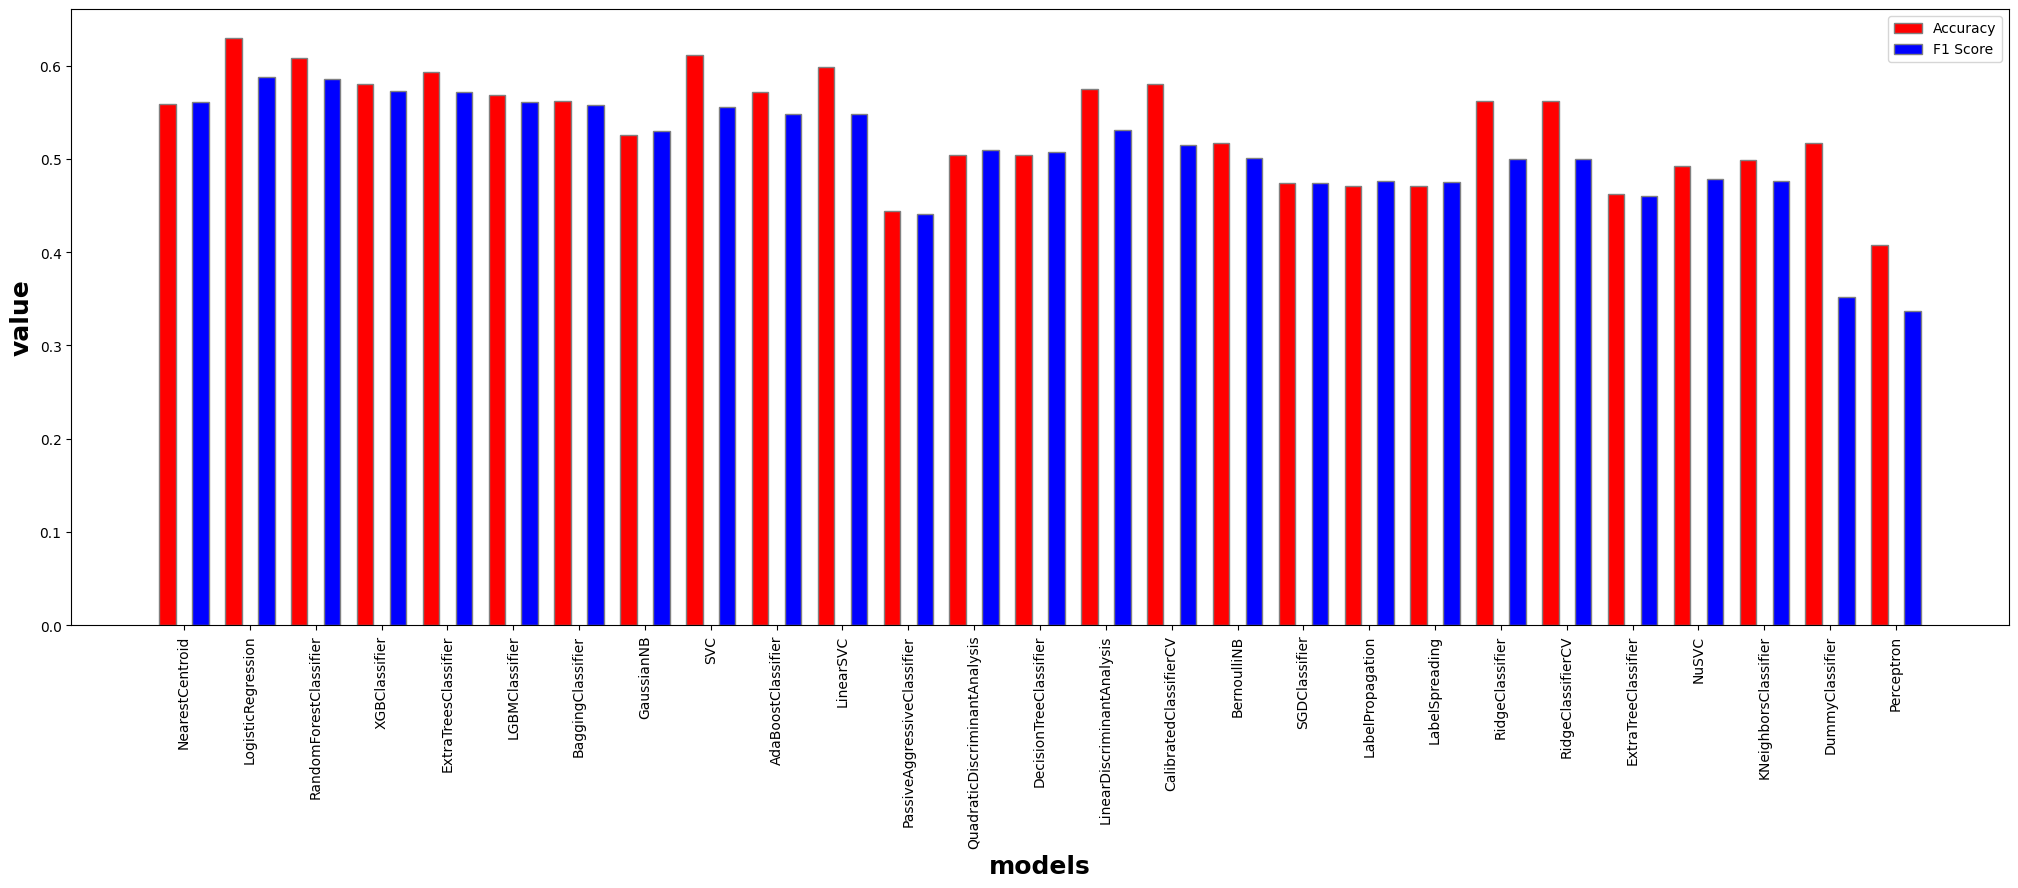

In [7]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(25, 8))


# set height of bar
acc = list(models['Accuracy'])
#auc = list(models['ROC AUC'])
f1s = list(models['F1 Score'])


# Set position of bar on Xaxis
br1 = np.arange(len(acc))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]


# Make the plot
plt.bar(br1, acc, color ='r', width = barWidth, edgecolor = 'grey', label ='Accuracy')
#plt.bar(br2, auc, color ='g', width = barWidth, edgecolor = 'grey', label ='auc')
plt.bar(br3, f1s, color ='b', width = barWidth, edgecolor = 'grey', label ='F1 Score')


# Adding Xticks
plt.xlabel('models', fontweight ='bold', fontsize = 18)
plt.ylabel('value', fontweight ='bold', fontsize = 18)
plt.xticks([r + barWidth for r in range(len(acc))], (list(models.index)))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.legend()
plt.savefig('../plots/fnmk_model_acc_f1s.png', bbox_inches='tight')
plt.show()

In [8]:
# Optimizing the RandomForest Classifier
rf_clf = RandomForestClassifier(random_state=1)

In [ ]:
modelF = rf_clf.fit(X_train, y_train)
y_predF = modelF.predict(X_test)

In [17]:
n_estimators = [75, 100, 200]
max_depth = [3, 4, 7, 10]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 5, 8, 20] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


gridF = GridSearchCV(rf_clf, hyperF, cv = 7, verbose = 1, 
                      n_jobs = -1, refit='accuracy', return_train_score=True)

bestF = gridF.fit(X_train, y_train)

Fitting 7 folds for each of 192 candidates, totalling 1344 fits


In [18]:
gridF.best_params_

{'max_depth': 4,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 100}

In [19]:
y_predF = bestF.predict(X_test)

In [20]:
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_predF)))

Model accuracy : 0.6018


In [ ]:
 # Optimizing LogisticRegression

In [30]:
log_clf = LogisticRegression(random_state=1)

In [31]:
model = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

In [34]:
result.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [36]:
y_predF = result.predict(X_test)

In [37]:
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_predF)))

Model accuracy : 0.6383
